# Imports

In [1]:
# Import packages
#!pip install seaborn
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [2]:
os.getcwd()

'/Users/traceyetheridge/Documents/Data_Science/Projects/Coronavirus & Global Stock Market/Covid-19-effect-on-Global-Stock-Market/04_Analysis'

In [3]:
# Import Data
file_name = 'df_indices_corona_joined.csv'
file_folder = "../03_SQL_Load/"
df = pd.read_csv(file_folder + file_name, sep=';')
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Daily_cases   6285 non-null   int64         
 1   Date          6285 non-null   datetime64[ns]
 2   Open          6238 non-null   float64       
 3   High          6238 non-null   float64       
 4   Low           6238 non-null   float64       
 5   Close         6238 non-null   float64       
 6   Adj Close     6238 non-null   float64       
 7   Volume        5024 non-null   float64       
 8   Index         6285 non-null   object        
 9   Name          6285 non-null   object        
 10  Country_Name  6285 non-null   object        
 11  Country_Code  6285 non-null   object        
 12  WHO_region    6285 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 638.4+ KB


In [5]:
df

,Daily_cases,Date,Open,High,Low,Close,Adj Close,Volume,Index,Name,Country_Name,Country_Code,WHO_region
0,147098,2020-11-24,22.04,22.48,20.80,21.64,21.64,NaN,VIX,CBOE Volatility Index,US,US,AMRO
1,147098,2020-11-24,1819.52,1862.17,1819.52,1853.53,1853.53,6.267570e+07,RUT,Russell 2000,US,US,AMRO
2,147098,2020-11-24,2268.15,2306.46,2266.41,2301.58,2301.58,NaN,XAX,NYSE AMEX COMPOSITE INDEX,US,US,AMRO
3,147098,2020-11-24,14158.71,14271.09,14138.38,14249.50,14249.50,6.267570e+09,NYA,NYSE COMPOSITE (DJ),US,US,AMRO
4,147098,2020-11-24,11939.33,12049.88,11863.45,12036.79,12036.79,6.277790e+09,IXIC,Nasdaq,US,US,AMRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,0,2020-10-01,12870.75,12927.08,12850.83,12865.71,12865.71,NaN,BUK100P,Cboe UK 100 Price Return,UK,GB,EURO
6281,0,2020-09-01,12823.94,12921.94,12823.94,12870.75,12870.75,NaN,BUK100P,Cboe UK 100 Price Return,UK,GB,EURO
6282,0,2020-08-01,12825.55,12841.11,12749.37,12824.19,12824.19,NaN,BUK100P,Cboe UK 100 Price Return,UK,GB,EURO
6283,0,2020-07-01,12821.01,12882.99,12812.11,12827.81,12827.81,NaN,BUK100P,Cboe UK 100 Price Return,UK,GB,EURO


In [6]:
#df.info()

# Analysis 1 - Biggest Loss/Gain since Coronavirus

Of the major world stock indices, which indices had the biggest loss/gain between coronavirus and now and how does this compare against current infection levels

In [7]:
df_gain_loss = pd.DataFrame(columns=['Index', 'Gain_Loss', 'Country', 'Total_Infections'])

min_date = datetime.strptime('2020-01-04', '%Y-%m-%d')
max_date = datetime.strptime('2020-11-24', '%Y-%m-%d')

for idx, index_code in enumerate(df['Index'].unique()):
    start_value = df[(df['Index']==index_code) & (df['Date']==min_date)]['Adj Close'].values[0]
    end_value = df[(df['Index']==index_code) & (df['Date']==max_date)]['Adj Close'].values[0]
    index_return = (end_value / start_value - 1) * 100
    total_infections = df[df['Index']==index_code]['Daily_cases'].sum()
    country = df[df['Index']==index_code]['Country_Code'][:1,].values[0]
    df_gain_loss.loc[idx] = [index_code, index_return, country, total_infections]

In [8]:
df_gain_loss.head(3)

,Index,Gain_Loss,Country,Total_Infections
0,VIX,-62.075009,US,8101493
1,RUT,72.905531,US,8101493
2,XAX,54.252089,US,8101493


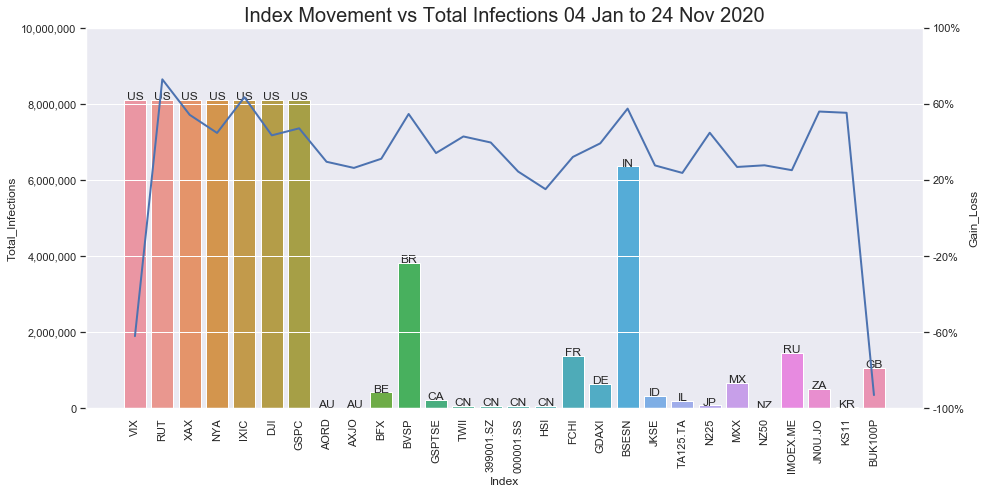

In [9]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1 = sns.barplot(x='Index', y='Total_Infections', data=df_gain_loss, ax=ax1)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Index Movement vs Total Infections 04 Jan to 24 Nov 2020', fontdict={'fontsize': 20})
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_ylim((0,10000000))
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_gain_loss['Gain_Loss'], ax=ax2, linewidth=2)
ax2.set_ylim((-100,100))
ax2.set_yticks(np.arange(-100,101,40))
ax2.set_yticklabels(['{:.0%}'.format(int(x)/100) for x in ax2.get_yticks().tolist()])

for bar, label in zip(ax1.patches, df_gain_loss['Country']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax1.text(x+width/2., height, label, ha="center") 
    
None

# Analysis 2 - Comprison of daily index movements to daily infections

Of the major world stock indices, which has been most stable in terms of daily closing prices and how does this compare to infection rates for the given country across the period
- e.g. does a stable infection rate correspond to a stable index or does a fluctuating infection rate (second wave) correspond to a fluctuating index 


### Part 1 - Index stability

In [10]:
min_date = datetime.strptime('2020-01-04', '%Y-%m-%d')
max_date = datetime.strptime('2020-11-24', '%Y-%m-%d')

df_daily_returns = df[['Date', 'Adj Close', 'Index', 'Country_Code']]
df_daily_returns = df_daily_returns[df_daily_returns['Date'] >=  min_date]
df_daily_returns = df_daily_returns[df_daily_returns['Date'] <=  max_date]
df_daily_returns = df_daily_returns.sort_values(['Index', 'Date'])

df_volatility = pd.DataFrame(columns=['Index', 'Index_Volatility', 'Country'])

for idx, index_code in enumerate(df_daily_returns['Index'].unique()):
    adj_close = df_daily_returns[df_daily_returns['Index'] == index_code]['Adj Close']
    log_returns = np.log(adj_close / adj_close.shift(1))
    volatility = np.std(log_returns) * np.sqrt(len(log_returns))
    country = df_daily_returns[df_daily_returns['Index'] == index_code]['Country_Code'].unique()[0]
    df_volatility.loc[idx] = [index_code, volatility, country]
    
df_volatility = df_volatility.sort_values('Index_Volatility', ascending=False)

In [11]:
df_volatility

,Index,Index_Volatility,Country
6,BUK100P,13.396501,GB
26,VIX,4.960391,US
7,BVSP,1.655866,BR
27,XAX,1.611025,US
17,JN0U.JO,1.544499,ZA
23,RUT,1.462957,US
9,FCHI,1.284552,FR
4,BFX,1.251260,BE
15,IXIC,1.228970,US
5,BSESN,1.198211,IN


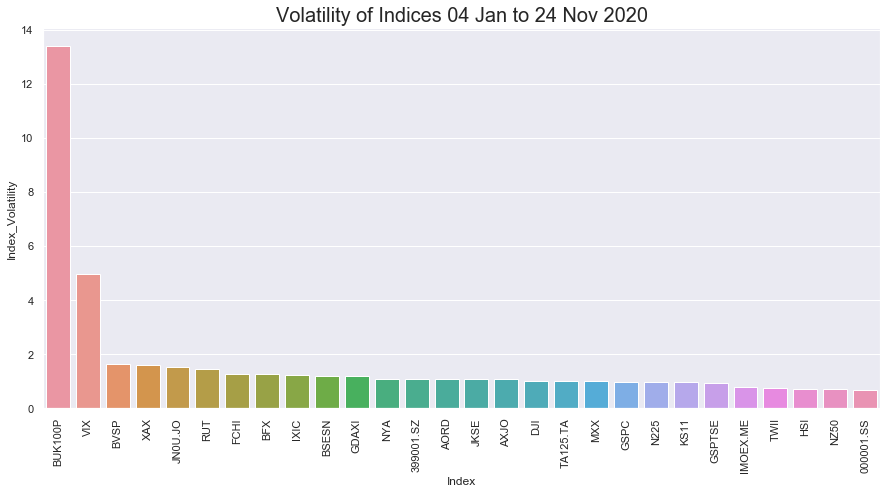

In [12]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1 = sns.barplot(x ='Index', y='Index_Volatility', data=df_volatility)
plt.title('Volatility of Indices 04 Jan to 24 Nov 2020', fontdict={'fontsize': 20})
ax1.xaxis.set_tick_params(rotation=90)
None

### Part 2 - Infections Volatility

In [13]:
df.head(1)

,Daily_cases,Date,Open,High,Low,Close,Adj Close,Volume,Index,Name,Country_Name,Country_Code,WHO_region
0,147098,2020-11-24,22.04,22.48,20.8,21.64,21.64,NaN,VIX,CBOE Volatility Index,US,US,AMRO


In [14]:
min_date = datetime.strptime('2020-01-04', '%Y-%m-%d')
max_date = datetime.strptime('2020-11-24', '%Y-%m-%d')

df_daily_inf_rate = df[['Date', 'Daily_cases', 'Country_Code']]
df_daily_inf_rate = df_daily_inf_rate[df_daily_inf_rate['Date'] >=  min_date]
df_daily_inf_rate = df_daily_inf_rate[df_daily_inf_rate['Date'] <=  max_date]
df_daily_inf_rate = df_daily_inf_rate.drop_duplicates()
df_daily_inf_rate = df_daily_inf_rate.sort_values(['Country_Code', 'Date'])

In [15]:
#df_daily_inf_rate.groupby('Country_Code').count()

In [16]:
df_volatility_inf = pd.DataFrame(columns=['Country', 'Inf_Volatility'])

for idx, country in enumerate(df_daily_inf_rate['Country_Code'].unique()):
    infections = df_daily_inf_rate[df_daily_inf_rate['Country_Code'] == country]['Daily_cases']
    infections_mvmt = infections - infections.shift(1)
    volatility = np.sqrt(infections_mvmt.var())
    df_volatility_inf.loc[idx] = [country, volatility]
    
df_volatility_inf = df_volatility_inf.sort_values('Inf_Volatility', ascending=False)

In [17]:
df_volatility_inf

,Country,Inf_Volatility
16,US,23493.639512
10,IN,20163.916729
2,BR,15042.977673
6,FR,11492.563440
7,GB,5717.189500
5,DE,4645.742215
15,RU,4461.242527
1,BE,3150.289826
17,ZA,2664.401001
13,MX,1706.960191


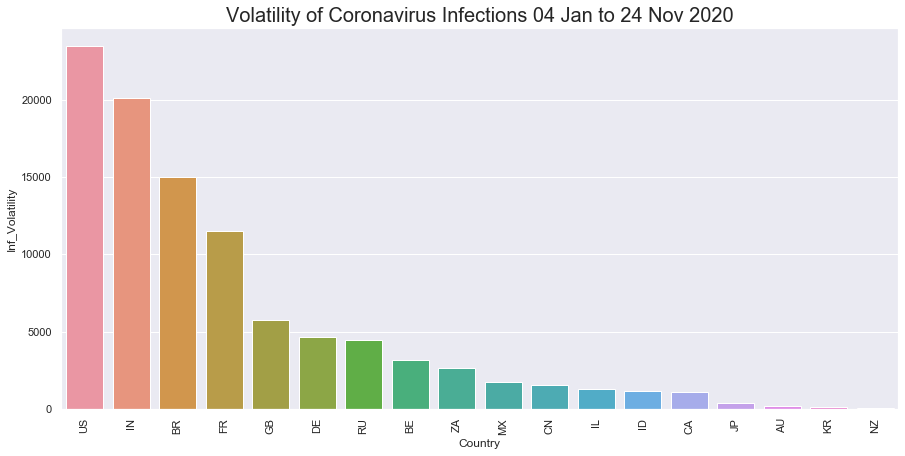

In [18]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1 = sns.barplot(x ='Country', y='Inf_Volatility', data=df_volatility_inf)
plt.title('Volatility of Coronavirus Infections 04 Jan to 24 Nov 2020', fontdict={'fontsize': 20})
ax1.xaxis.set_tick_params(rotation=90)
None

In [19]:
df_volatility = df_volatility.merge(df_volatility_inf, left_on='Country', right_on='Country', how='left')
df_volatility.head(3)

,Index,Index_Volatility,Country,Inf_Volatility
0,BUK100P,13.396501,GB,5717.189500
1,VIX,4.960391,US,23493.639512
2,BVSP,1.655866,BR,15042.977673


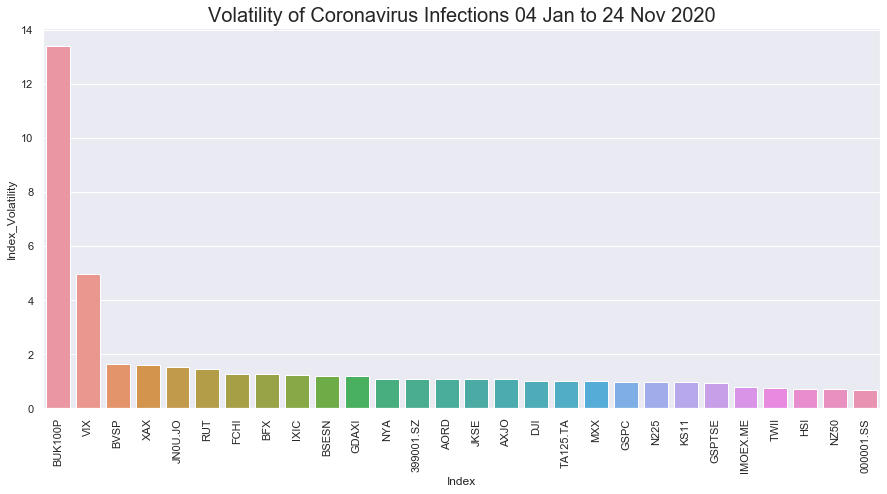

In [20]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1 = sns.barplot(x ='Index', y='Index_Volatility', data=df_volatility)
plt.title('Volatility of Coronavirus Infections 04 Jan to 24 Nov 2020', fontdict={'fontsize': 20})
ax1.xaxis.set_tick_params(rotation=90)
None

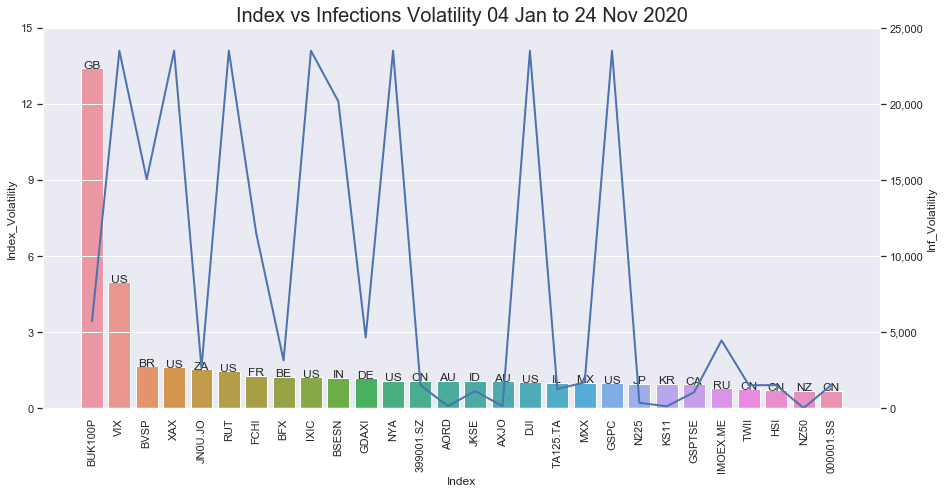

In [21]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1 = sns.barplot(x ='Index', y='Index_Volatility', data=df_volatility, ax=ax1)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Index vs Infections Volatility 04 Jan to 24 Nov 2020', fontdict={'fontsize': 20})
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_ylim((0,15))
ax1.set_yticks(np.arange(0,16,3))
#ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_volatility['Inf_Volatility'], ax=ax2, linewidth=2)
ax2.set_ylim((0,25000))
ax2.set_yticks(np.arange(0,26000,5000))
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])

for bar, label in zip(ax1.patches, df_volatility['Country']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax1.text(x+width/2., height, label, ha="center") 
    
None

# Analysis 3 - Highest daily percentage change in index vs coronavirus cases 

Of the major world stock indices does the highest daily percentage change correspond to a large increase or decrease in daily coronavirus cases. 

In [22]:
df = df.sort_values(['Index', 'Date'])
df_gain_loss_daily = pd.DataFrame(columns=['Index', 'Date', 'Returns', 'Country', 'Infections_Change', 'Infections_Diff'])

min_date = datetime.strptime('2020-01-04', '%Y-%m-%d')
max_date = datetime.strptime('2020-11-24', '%Y-%m-%d')


for index_code in (df['Index'].unique()):
    daily_returns = (df[df['Index']==index_code]['Adj Close'] - df[df['Index']==index_code]['Adj Close'].shift(1)) / df[df['Index']==index_code]['Adj Close'].shift(1)
    daily_infec_change = (df[df['Index']==index_code]['Daily_cases'] - df[df['Index']==index_code]['Daily_cases'].shift(1)) / df[df['Index']==index_code]['Daily_cases'].shift(1)
    daily_infec_diff = (df[df['Index']==index_code]['Daily_cases'] - df[df['Index']==index_code]['Daily_cases'].shift(1))
    df_temp = pd.DataFrame([df[df['Index']==index_code]['Index'], df[df['Index']==index_code]['Date'].shift(0), daily_returns, 
                            df[df['Index']==index_code]['Country_Code'], daily_infec_change, daily_infec_diff ])
    df_temp = df_temp.T
    df_temp.columns = ['Index', 'Date', 'Returns', 'Country', 'Infections_Change', 'Infections_Diff']
    df_temp['Date'] = pd.to_datetime(df_temp['Date'])
    df_gain_loss_daily = df_gain_loss_daily.append(df_temp)
    
df_gain_loss_daily.reset_index(inplace=True, drop=True)
df_gain_loss_daily.dropna(inplace=True)
df_gain_loss_daily['Returns'] = df_gain_loss_daily['Returns'].astype(float)

In [23]:
df_max_return_mvmt = pd.DataFrame(columns=['Index', 'Date', 'Returns', 'Country', 'Infections_Change', 'Infections_Diff'])

for idx, index_code in enumerate((df_gain_loss_daily['Index'].unique())):
    max_return = df_gain_loss_daily[df_gain_loss_daily['Index'] == index_code]['Returns'].max()
    min_return = df_gain_loss_daily[df_gain_loss_daily['Index'] == index_code]['Returns'].min()
    max_mvmt = max(max_return, abs(min_return))
    if max_return >= abs(min_return):
        idx = df_gain_loss_daily[df_gain_loss_daily['Index'] == index_code]['Returns'].idxmax()
        row = df_gain_loss_daily.loc[idx]
    else:
        idx = df_gain_loss_daily[df_gain_loss_daily['Index'] == index_code]['Returns'].idxmin()
        row = df_gain_loss_daily.loc[idx]
    df_max_return_mvmt.loc[idx] = row

In [24]:
df[(df['Index']=='BVSP') & (df['Date']=='2020-04-02')]

,Daily_cases,Date,Open,High,Low,Close,Adj Close,Volume,Index,Name,Country_Name,Country_Code,WHO_region
2486,0,2020-04-02,114631.0,116556.0,114631.0,115557.0,115557.0,5829400.0,BVSP,IBOVESPA,Brazil,BR,AMRO


In [25]:
df_max_return_mvmt.sort_values('Country')

,Index,Date,Returns,Country,Infections_Change,Infections_Diff
489,AORD,2020-04-02,0.379016,AU,-0.996795,-311.0
719,AXJO,2020-04-02,0.368717,AU,-0.996795,-311.0
948,BFX,2020-04-02,0.392317,BE,-0.999425,-1738.0
1626,BVSP,2020-04-02,0.582539,BR,-1.000000,-352.0
2764,GSPTSE,2020-04-02,0.308989,CA,-1.000000,-662.0
152,000001.SS,2020-09-07,0.167274,CN,7.250000,29.0
5668,TWII,2020-04-13,-0.215162,CN,2.733333,82.0
3026,HSI,2020-06-01,0.229285,CN,inf,3.0
272,399001.SZ,2020-04-13,-0.251571,CN,2.733333,82.0
2308,GDAXI,2020-04-02,0.336751,DE,-0.999567,-4613.0
